STEPS:
1.   Data imported into sample_data folder 
Source: https://data.world/jboutros/2015-car-thefts-by-state
2.   Installed libraries.
3.   Create list of vehicles 
4.   Created Frequency dictionary to count car makes such as Nissan, Toyota and the number of times it is stolen.
5.  Created word cloud/tag cloud showing which car make and model are stolen more frequently than others in the form of word size. Bigger the word, higher is the frequency that word was repeated in the data.

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
import itertools as it
!pip install nltk
%matplotlib inline 
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Car_thefts.csv', quoting = 2)
df.head(10)

,Theft_Year,Veh Model Yr,Vehicle,# of Thefts
0,2015.0,2015.0,Nissan Altima,"1,104"
1,2015.0,2015.0,Chrysler 200,"1,069"
2,2015.0,2015.0,Toyota Camry,923
3,2015.0,2015.0,Toyota Corolla,776
4,2015.0,2015.0,GMC Sierra,670
5,2015.0,2015.0,Dodge Charger,666
6,2015.0,2015.0,Hyundai Sonata,632
7,2015.0,2015.0,Chevrolet Malibu,629
8,2015.0,2015.0,Chevrolet Impala,594
9,2015.0,2015.0,Chevrolet Cruze,586




```
# Create frequency dictionary for words in title column
```



In [ ]:
#text = movie_df['Plot'][(movie_df ['Release Year']>1930) & (movie_df['Release Year'] < 1960)].values.tolist()
# text is list of plots. 

text_title = df['Vehicle'].values.tolist()
text = [Vehicle.split(" ") for Vehicle in text_title]
text = list(it.chain.from_iterable(text))
print(text[:5])

['Nissan', 'Altima', 'Chrysler', '200', 'Toyota']


## Create Frequency Dictionary

In [ ]:
freq_dict = {}
for word in text:
  if word not in freq_dict:
    freq_dict[word] = 0

  freq_dict[word] += 1

In [ ]:
def plot_word_cloud(freq_dict):
  wc = WordCloud(background_color="black")
  wc.generate_from_frequencies(freq_dict)
  plt.figure(figsize=(10,10))
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()

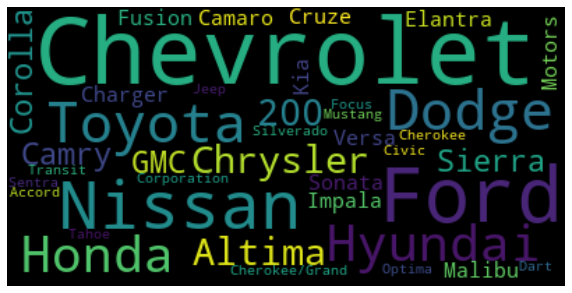

In [ ]:
plot_word_cloud(freq_dict)


## most common words found in any typical language (incl.English) discourse (words like "the", "and" ) are also most frequent here. These are uninteresting. Such words are called as "stop words" and must be removed to get a more interesting plot of the most frequent words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


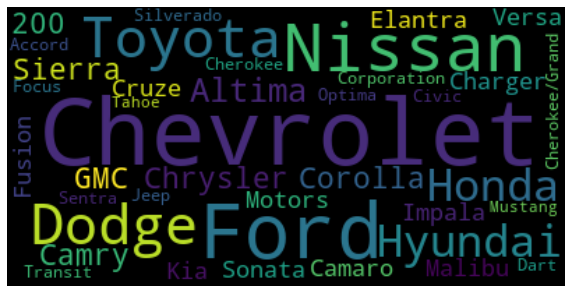

In [ ]:
!pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

freq_dict = {k: v for k, v in freq_dict.items() if k.lower() not in stop_words}
plot_word_cloud(freq_dict)